<a href="https://colab.research.google.com/github/AlexeySto/Result_controlling_work-By_block_specialization/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%B1%D0%BB%D0%BE%D0%BA%D1%83_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?


In [3]:
# Загрузка данных
import pandas as pd


data = pd.read_csv('/content/ab_stats.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [2]:
from scipy import stats


# Расчет ARPPU для каждой группы
ab_grouped = data.groupby('ab_group').agg(
    total_revenue=('revenue', 'sum'),
    num_paying_users=('num_purchases', 'sum')
)

# Избегаем деления на ноль
ab_grouped['ARPPU'] = ab_grouped['total_revenue'] / ab_grouped['num_paying_users'].replace(0, float('nan'))

# Вывод результатов
print("ARPPU по группам:")
print(ab_grouped[['total_revenue', 'num_paying_users', 'ARPPU']])

# Статистический тест (t-тест для независимых выборок)
group_a = data[data['ab_group'] == 'A']['revenue']
group_b = data[data['ab_group'] == 'B']['revenue']

t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

print("\nРезультаты t-теста:")
print(f"Статистическое значение t: {t_stat}, p-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("\nРазница в ARPPU статистически значима.")
else:
    print("\nРазница в ARPPU незначима.")


ARPPU по группам:
          total_revenue  num_paying_users     ARPPU
ab_group                                           
A           4786.807972               600  7.978013
B           2892.735789               431  6.711684

Результаты t-теста:
Статистическое значение t: 1.2854813731628816, p-значение: 0.19864664657596015

Разница в ARPPU незначима.


Рекомендации для менеджера:

1. Провести дополнительный анализ данных:
   - Изучить другие метрики, такие как LTV (Lifetime Value) и конверсия пользователей, чтобы получить полное представление о работе групп.
   - Рассмотреть возможности сегментации пользователей по другим критериям, например, по возрасту, геолокации или времени активности.

2. Проверить на наличие влияния внешних факторов:
   - Оценить, могли ли маркетинговые кампании, сезонные изменения или другие внешние факторы повлиять на результаты теста

3. Внедрить другие экспериментальные подходы:
   - Рассмотреть возможность проведения новых A/B тестов с изменениями в дизайне, функциональности или ценовой политике, чтобы выявить более значимые изменения.

4. Анализ времени проведения теста:
   - Убедиться, что тест проводился в достаточное время, чтобы учесть колебания поведения пользователей, такие как праздники или выходные.

5. Провести фокус-группы:
   - Собирать отзывы пользователей о продукте или услуге, чтобы определить, что может быть улучшено и как это может отразиться на доходах.

6. Оценить конкурентное окружение:
   - Исследовать, как конкуренты вводят свои предложения, что может дать идеи для улучшения ARPPU.

7. Обсудить альтернативные стратегии:
   - Рассмотреть другие бизнес-стратегии, которые могут быть более эффективными в долгосрочной перспективе, такие как работа с клиентами на удержание.

8. Регулярный мониторинг и повторное тестирование:
   - Установить план для регулярного мониторинга ключевых метрик и повторного тестирования после внедрения изменений.

2. Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.

1) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

2) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:

    1) 25 000

    2) 30 000

    3) 32 000


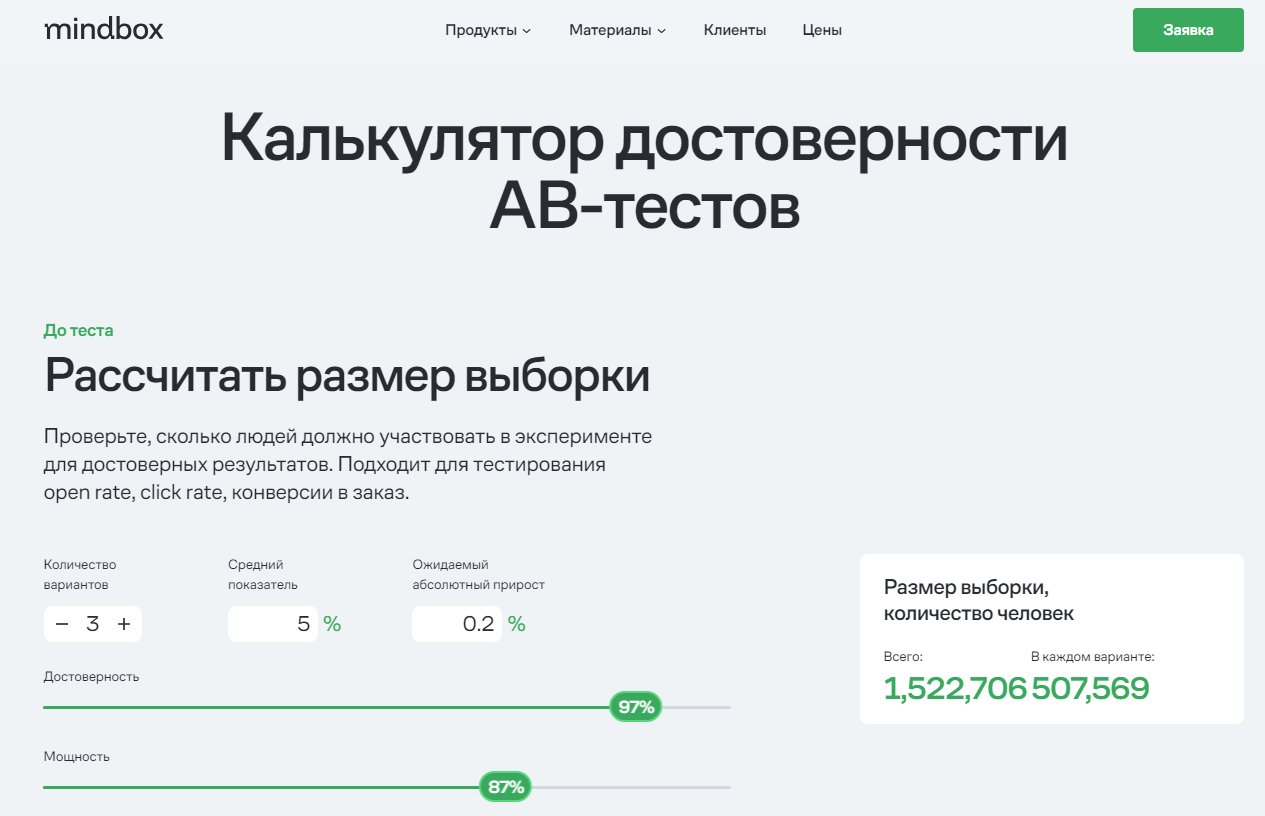

По результатам расчета калькулятора, видим, что для тестирования гипотезы, нам понадобиться 1 522 706 человек. Так как в месяц на наш продукт заходит 40 000 пользователей, значит в день 40 000 / 30 = 1 333 человек.

А это значит что для тестирования гипотезы нам понадобится 1 522 706 / 1 333 = 1143 дня.

По результатам подсчета я бы рекомендовал следующее:

1. Разбить данный тест с тремя вариантами, на два теста с двумя вариантами, что позволит сократиь время проведения теста в 1,5 раза.
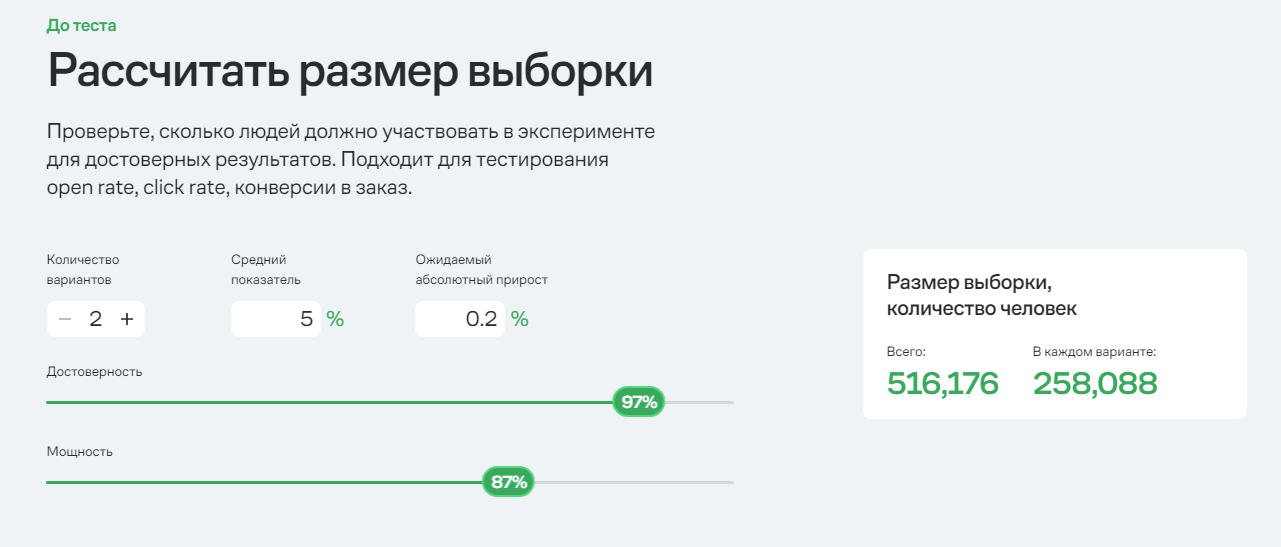

2. Понизить уровень доверия или мощность, если это допустимо. Что так же приведет к снижению длительности теста.

3. Если возможно, попробовать увеличить количество пользователей нашего продукта. Чем больше трафика, тем быстрее можно достичь нужного числа участников теста.

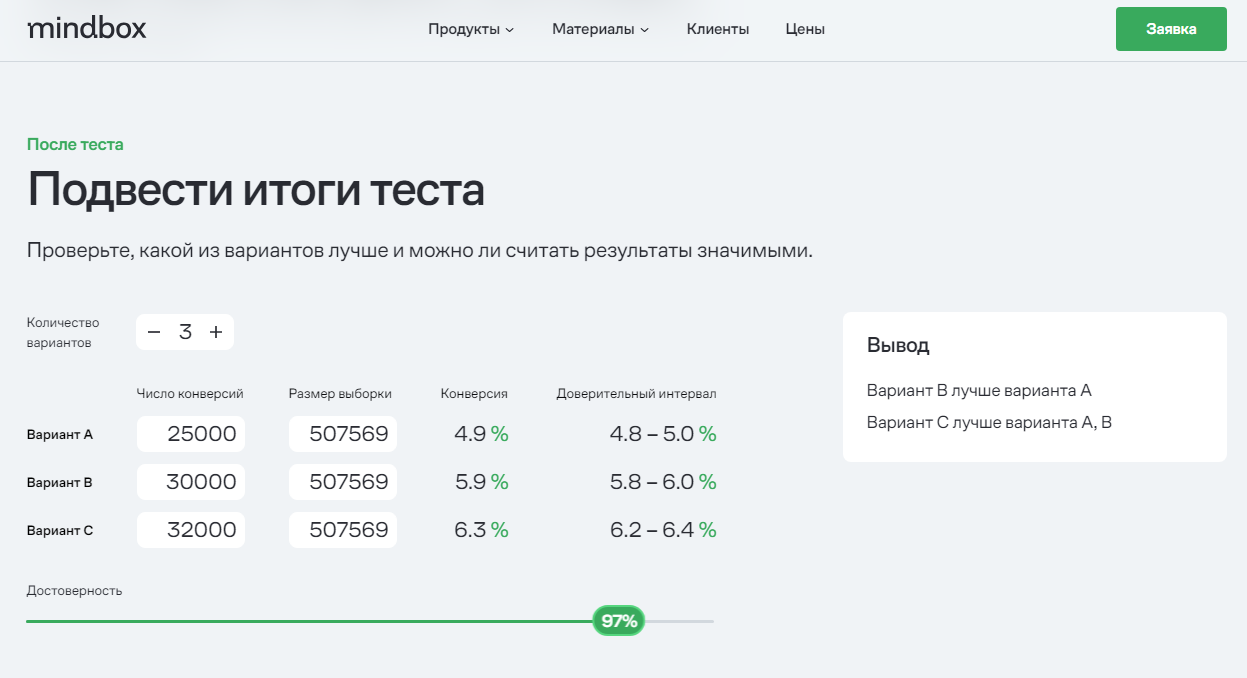

По результатам проведения теста лучше всего себя показал вариант под номером 3.

3. Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?


Анализ результата теста Шапиро-Уилка

Р-value = 0.00002, что значительно меньше уровня значимости alpha = 5% (0.05). Это означает, что распределение CPA в обеих группах не имеет нормального характера.

Выбор статистического критерия:

В ситуациях, когда данные не распределены нормально, рекомендуется использовать непараметрические методы. Для сравнения CPA между двумя группами в данном случае наиболее подходящим будет критерий Манна-Уитни.

Почему критерий Манна-Уитни?

1. Работа с ненормальным распределением.
2. Сравнение двух независимых групп.
3. Меньшая чувствительность к выбросам.

4. Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789

In [ ]:
import numpy as np
from scipy import stats

# Данные группы A
mean_a = 360
std_a = 40
n_a = 9802

# Данные группы B
mean_b = 352
std_b = 58
n_b = 9789

# Стандартная ошибка разности средних
se = np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Статистическое значение t
t_statistic = (mean_a - mean_b) / se

# Степени свободы
df = n_a + n_b - 2

# Критическое значение t для двустороннего теста (уровень доверия 80%)
alpha = 0.20
critical_t = stats.t.ppf(1 - alpha / 2, df)

# Вывод результатов
print(f"Статистическое значение t: {t_statistic:.2f}")
print(f"Критическое значение t: {critical_t:.2f}")

# Проверка на значимость
if abs(t_statistic) > critical_t:
    print("Результат является статистически значимым. Рекомендуется выкатить версию A на продакшн.")
else:
    print("Результат не является статистически значимым. Рекомендуется не выкатывать версию A.")


Статистическое значение t: 11.24
Критическое значение t: 1.28
Результат является статистически значимым. Рекомендуется выкатить версию A на продакшн.


5. Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.

На схеме необходимо отобразить:

1) Управленческий процесс по договоренностям с внешними партнерами

2) Архитектуру данных с указанием систем, из которых будем скачивать данные

3) Внутрикомандное взаимодействие


Техническая архитектура проекта по A/B тестированию продукта онлайн-кинотеатра

1. Управленческий процесс по договоренностям с внешними партнерами
- Этап 1: Исследование и выбор банка
  - Анализ предложений от различных банков
  - Выбор подходящего партнера для кэшбэка
- Этап 2: Переговоры с банком
  - Обсуждение условий и предложения по кэшбэку
  - Подписание договора
- Этап 3: Подготовка и запуск акции
  - Определение сроков проведения акции
  - Разработка рекламных материалов и информирование пользователей

2. Архитектура данных
- Системы источников данных:
  - CRM система: Сбор информации о пользователях и их действиях
  - Система аналитики: Google Analytics или Яндекс.Метрика для отслеживания поведения пользователей на сайте
  - Система биллинга: Данные о подписках и платежах пользователей
  - Партнерская система банка: Данные о кэшбэке для пользователей
- Хранилище данных:
  - Data Warehouse: Объединение данных из указанных систем для анализа (например, Amazon Redshift или Google BigQuery)

3. Внутрикомандное взаимодействие
- Команда продукта
  - Разработка и запуск A/B теста, анализ результатов
- Маркетинговая команда
  - Подготовка рекламной кампании для продвижения акции с кэшбэком
- Аналитическая команда
  - Анализ данных, полученных из различных систем, оценка результатов теста
- Команда поддержки
  - Обработка запросов пользователей по вопросам кэшбэка и подписки

### Схема:

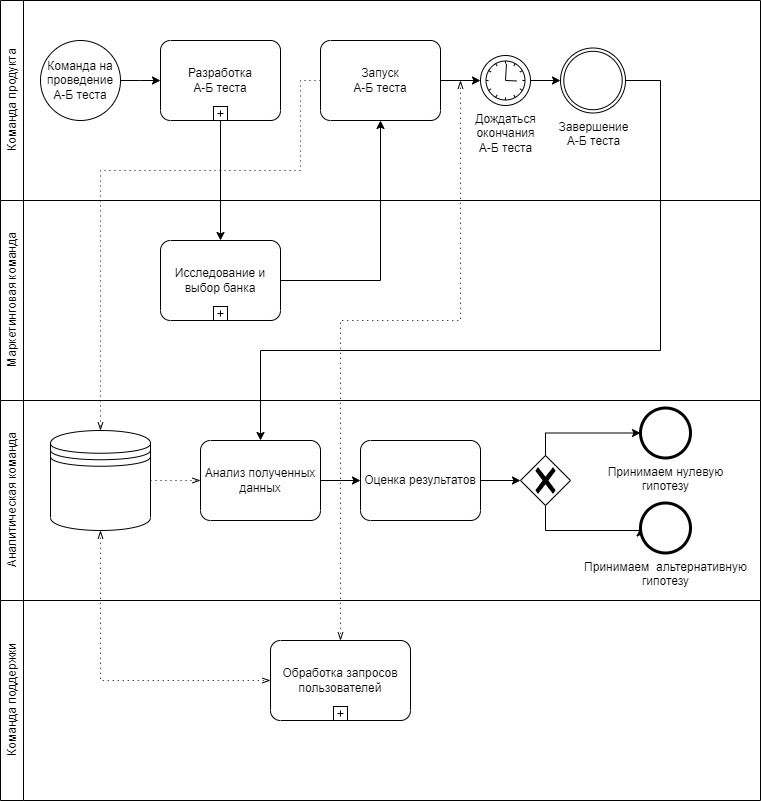

### Описание:
- Управленческий процесс предполагает последовательное выполнение шагов от выбора банка до запуска акции.
- Архитектура данных включает важные источники данных и описывает, где и как будет выполнен сбор данных для анализа.
- Взаимодействие между командами необходимо для успешного выполнения проекта, анализа результатов и реагирования на запросы пользователей.